<a href="https://colab.research.google.com/github/jear2412/PyTorchExamples/blob/main/sinx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# -*- coding: utf-8 -*-

# Basic example: L2 loss to approximate sin x with a polynomial of degree 3
# Objective: learn how to use tensors and an introduction to autograd 
# 

import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns


sns.set_theme(style='darkgrid', palette='deep')

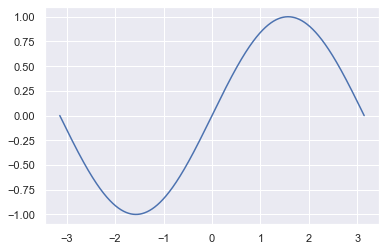

In [2]:
# Create random input and output data
x = np.linspace(-math.pi, math.pi, 2000)
y = np.sin(x) 

plt.plot(x, y)

In [3]:
# Randomly initialize weights
a = np.random.randn()
b = np.random.randn()
c = np.random.randn()
d = np.random.randn()

learning_rate = 1e-6
#iterative gradient descent 
for t in range(3000):
    # Forward pass: compute predicted y
    # y = a + b x + c x^2 + d x^3
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss
    loss = np.square(y_pred - y).sum()
    if t % 100 == 99:
        print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum() #partial L respect to a
    grad_b = (grad_y_pred * x).sum() #partial L respect to b
    grad_c = (grad_y_pred * x ** 2).sum() #partial L respect to c
    grad_d = (grad_y_pred * x ** 3).sum() #partial L respect to d

    # Update weights --> gradient descent 
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3')

99 4619.667334485823
199 3183.8369657056965
299 2197.531746353461
399 1519.2506234380257
499 1052.2767955042493
599 730.4267436427975
699 508.35887687434774
799 354.97457437696494
899 248.91978151519987
999 175.515017914342
1099 124.65781931580862
1199 89.3879422104953
1299 64.90479011563966
1399 47.89375716915745
1499 36.06383899625319
1599 27.82989459353799
1699 22.094061964620135
1799 18.095218275111435
1899 15.305188792772668
1999 13.357109932863759
2099 11.995932737955417
2199 11.044188417337633
2299 10.378285870183685
2399 9.91208481331341
2499 9.58550021680366
2599 9.356589598318942
2699 9.196053685642006
2799 9.08341099294343
2899 9.004334521943685
2999 8.948796015672936
Result: y = -0.011592199599173994 + 0.8534169175850025 x + 0.0019998473258914643 x^2 + -0.09285758958481743 x^3


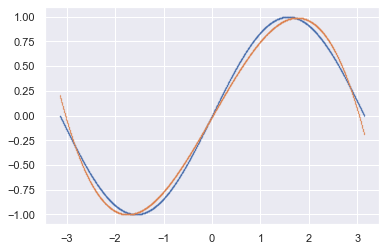

In [5]:
plt.plot( x, y, '.' , label='sin x' , markersize=0.5 )
plt.plot( x, a+b*x+c*x**2+d*x**3 , '.', label= 'approx', markersize=0.5 )

In [22]:
import torch #we will use tensors now
import math

dtype = torch.float
device = torch.device("cpu")
#device = torch.device("cuda:0") # Uncomment this to run on GPU


In [23]:
print(device) #no cuda in my computer --> sad

cpu


In [24]:

# Create random input and output data
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# Randomly initialize weights
a = torch.randn((), device=device, dtype=dtype)
b = torch.randn((), device=device, dtype=dtype)
c = torch.randn((), device=device, dtype=dtype)
d = torch.randn((), device=device, dtype=dtype)

learning_rate = 1e-6
for t in range(4000):
    # Forward pass: compute predicted y / forward map: just evaluate y hat
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss // quadratic loss or least squares 
    loss = (y_pred - y).pow(2).sum().item()
    if t % 100 == 99:
        print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    # gradient descent
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights using gradient descent
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d


print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')

#manual implementation of both forward and backward process

#use autograd: the forward map defines a computational graph 
# nodes: tensors
# edges: functions that produce output tensors from input tensors

#backpropagation allows calculation of gradients!

#x.requires_grad=True then x.grad is another Tensor holding the gradient of x with respect to some scalar value!




99 1278.9654541015625
199 853.53759765625
299 570.8099365234375
399 382.8560485839844
499 257.86383056640625
599 174.7115936279297
699 119.37284088134766
799 82.52938842773438
899 57.988914489746094
999 41.6358757019043
1099 30.733715057373047
1199 23.46177101135254
1299 18.6086483001709
1399 15.368051528930664
1499 13.202858924865723
1599 11.755372047424316
1699 10.787060737609863
1799 10.138888359069824
1899 9.704695701599121
1999 9.413610458374023
2099 9.21833610534668
2199 9.087226867675781
2299 8.999135971069336
2399 8.93989086151123
2499 8.900018692016602
2599 8.87315559387207
2699 8.8550386428833
2799 8.842812538146973
2899 8.834548950195312
2999 8.828964233398438
3099 8.825180053710938
3199 8.822615623474121
3299 8.820877075195312
3399 8.819695472717285
3499 8.818894386291504
3599 8.81834602355957
3699 8.817974090576172
3799 8.817719459533691
3899 8.817545890808105
3999 8.817422866821289
Result: y = 0.0004028015537187457 + 0.8564110994338989 x + -6.948854570509866e-05 x^2 + -0.

In [25]:
# Here we use PyTorch Tensors and autograd to implement our fitting sine wave with third order polynomial example 
import torch
import math

dtype = torch.float
device = torch.device("cpu")
#device = torch.device("cuda:0")  

# Create Tensors to hold input and outputs.
# By default, requires_grad=False, which indicates that we do not need to
# compute gradients with respect to these Tensors during the backward pass.

x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# Create random Tensors for weights. For a third order polynomial, we need
# 4 weights: y = a + b x + c x^2 + d x^3

# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.
a = torch.randn((), device=device, dtype=dtype, requires_grad=True)
b = torch.randn((), device=device, dtype=dtype, requires_grad=True)
c = torch.randn((), device=device, dtype=dtype, requires_grad=True)
d = torch.randn((), device=device, dtype=dtype, requires_grad=True)

learning_rate = 1e-6
for t in range(4000):
    # Forward pass: compute predicted y using operations on Tensors.
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss using operations on Tensors.
    # Now loss is a Tensor of shape (1,)

    # loss.item() gets the scalar value held in the loss. --> very important!
    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
        print(t, loss.item())

    # Use autograd to compute the backward pass. This call will compute the
    # gradient of loss with respect to all Tensors with requires_grad=True.

    

    # After this call a.grad, b.grad. c.grad and d.grad will be Tensors holding
    # the gradient of the loss with respect to a, b, c, d respectively.
    loss.backward()

    # Manually update weights using gradient descent. Wrap in torch.no_grad()
    # because weights have requires_grad=True, but we don't need to track this
    # in autograd.
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad

        # Manually zero the gradients after updating weights
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None

print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3') #once again items holds the value we are interested in 



99 2140.175048828125
199 1480.000244140625
299 1025.3885498046875
399 711.9854125976562
499 495.6965637207031
599 346.27081298828125
699 242.929931640625
799 171.38851928710938
899 121.81194305419922
999 87.42311096191406
1099 63.54676055908203
1199 46.95417022705078
1299 35.41312026977539
1399 27.3787899017334
1499 21.781044006347656
1599 17.877763748168945
1699 15.15401554107666
1799 13.251919746398926
1899 11.922677993774414
1999 10.993134498596191
2099 10.342681884765625
2199 9.88723087310791
2299 9.56813907623291
2399 9.34445571899414
2499 9.187566757202148
2599 9.077472686767578
2699 9.000173568725586
2799 8.945882797241211
2899 8.907729148864746
2999 8.88090705871582
3099 8.862044334411621
3199 8.848773956298828
3299 8.839433670043945
3399 8.832858085632324
3499 8.828227043151855
3599 8.82496452331543
3699 8.822665214538574
3799 8.821044921875
3899 8.819903373718262
3999 8.819098472595215
Result: y = 0.0014404734829440713 + 0.8570138812065125 x + -0.00024850526824593544 x^2 + -0

In [ ]:
# now lets do it with a NN


import torch
import math


# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# For this example, the output y is a linear function of (x, x^2, x^3), so
# we can consider it as a linear layer neural network. Let's prepare the
# tensor (x, x^2, x^3).

#---- new 

p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p) #design matrix 

# In the above code, x.unsqueeze(-1) has shape (2000, 1), and p has shape
# (3,), for this case, broadcasting semantics will apply to obtain a tensor
# of shape (2000, 3) 

# Use the nn package to define our model as a sequence of layers.

# nn.Sequential is a Module which contains other Modules, and applies them in sequence to
# produce its output. 

#The Linear Module computes output from input using a linear function, 
#and holds internal Tensors for its weight and bias.


#The Flatten layer flatens the output of the linear layer to a 1D tensor,
# to match the shape of `y`.

model = torch.nn.Sequential(
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1)
)

# The nn package also contains definitions of popular loss functions; in this
# case we will use Mean Squared Error (MSE) as our loss function.

loss_fn = torch.nn.MSELoss(reduction='sum') #define loss function

learning_rate = 1e-6

for t in range(2000):

    # Forward pass: compute predicted y by passing x to the model. Module objects
    # override the __call__ operator so you can call them like functions. When
    # doing so you pass a Tensor of input data to the Module and it produces
    # a Tensor of output data.
    y_pred = model(xx)

    # Compute and print loss. We pass Tensors containing the predicted and true
    # values of y, and the loss function returns a Tensor containing the
    # loss.

    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # Zero the gradients before running the backward pass.
    model.zero_grad()

    # Backward pass: compute gradient of the loss with respect to all the learnable
    # parameters of the model. Internally, the parameters of each Module are stored
    # in Tensors with requires_grad=True, so this call will compute gradients for
    # all learnable parameters in the model.
    loss.backward()

    # Update the weights using gradient descent. Each parameter is a Tensor, so
    # we can access its gradients like we did before.
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

# You can access the first layer of `model` like accessing the first item of a list
linear_layer = model[0]

# For linear layer, its parameters are stored as `weight` and `bias`.
print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')

In [31]:
# Lets use optim now!

# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# Prepare the input tensor (x, x^2, x^3).
p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p) #design matrix / data

# 1) Create Model
# Use the nn package to define our model and loss function.
model = torch.nn.Sequential(
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1)
)

# 2) Loss function
loss_fn = torch.nn.MSELoss(reduction='sum')

# Use the optim package to define an Optimizer that will update the weights of
# the model for us. Here we will use RMSprop; the optim package contains many other
# optimization algorithms. The first argument to the RMSprop constructor tells the
# optimizer which Tensors it should update.

learning_rate = 1e-3
optimizer = torch.optim.Adam (model.parameters(), lr=learning_rate) #declare optimizer
T=2000
for t in range(T):
    # Forward pass: compute predicted y by passing x to the model.
    y_pred = model(xx)

    # Compute and print loss.
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # Before the backward pass, use the optimizer object to zero all of the
    # gradients for the variables it will update (which are the learnable
    # weights of the model). This is because by default, gradients are
    # accumulated in buffers( i.e, not overwritten) whenever .backward()
    # is called. Checkout docs of torch.autograd.backward for more details.

    # 3) optimize 

    optimizer.zero_grad() #establish zero gradients

    #4)  Backward pass: compute gradient of the loss with respect to model
    # parameters
    loss.backward()

    #5) Optimize again
    # Calling the step function on an Optimizer makes an update to its
    # parameters
    optimizer.step()


linear_layer = model[0]
print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')

99 5452.2744140625
199 1776.9423828125
299 899.7794189453125
399 740.3978881835938
499 688.7952880859375
599 644.9805908203125
699 600.1868896484375
799 554.6690673828125
899 509.11688232421875
999 464.1470947265625
1099 420.2901916503906
1199 377.9954528808594
1299 337.6334533691406
1399 299.5003967285156
1499 263.8219299316406
1599 230.756591796875
1699 200.40174865722656
1799 172.79833984375
1899 147.9362030029297
1999 125.76054382324219
Result: y = -1.726469411877929e-09 + 0.5244632363319397 x + -9.446333298912535e-11 x^2 + -0.04506111517548561 x^3
